#Цель лабораторной работы

Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

#Задание
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:

#Ход выполнения работы

In [0]:
from google.colab import files

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style="ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving PatientInfo.csv to PatientInfo (2).csv
User uploaded file "PatientInfo.csv" with length 220884 bytes


In [0]:
data = pd.read_csv('PatientInfo.csv')

##Информация о датасете
В качестве датасета для лабораторной работы был выбран датасет с подтвержденной информацией о пациентах, заболевших COVID-19 в Южной Корее

In [0]:
data.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [0]:
data.isnull().sum()

patient_id               0
global_num             904
sex                    145
birth_year             454
age                    261
country                  0
province                 0
city                    65
disease               2199
infection_case        1055
infection_order       2176
infected_by           1749
contact_number        1807
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
dtype: int64

##Обработка пропусков в данных
Осуществлено методом установки 0, среднего значения, медианного значения и методом установки блиайшего указанного значения.

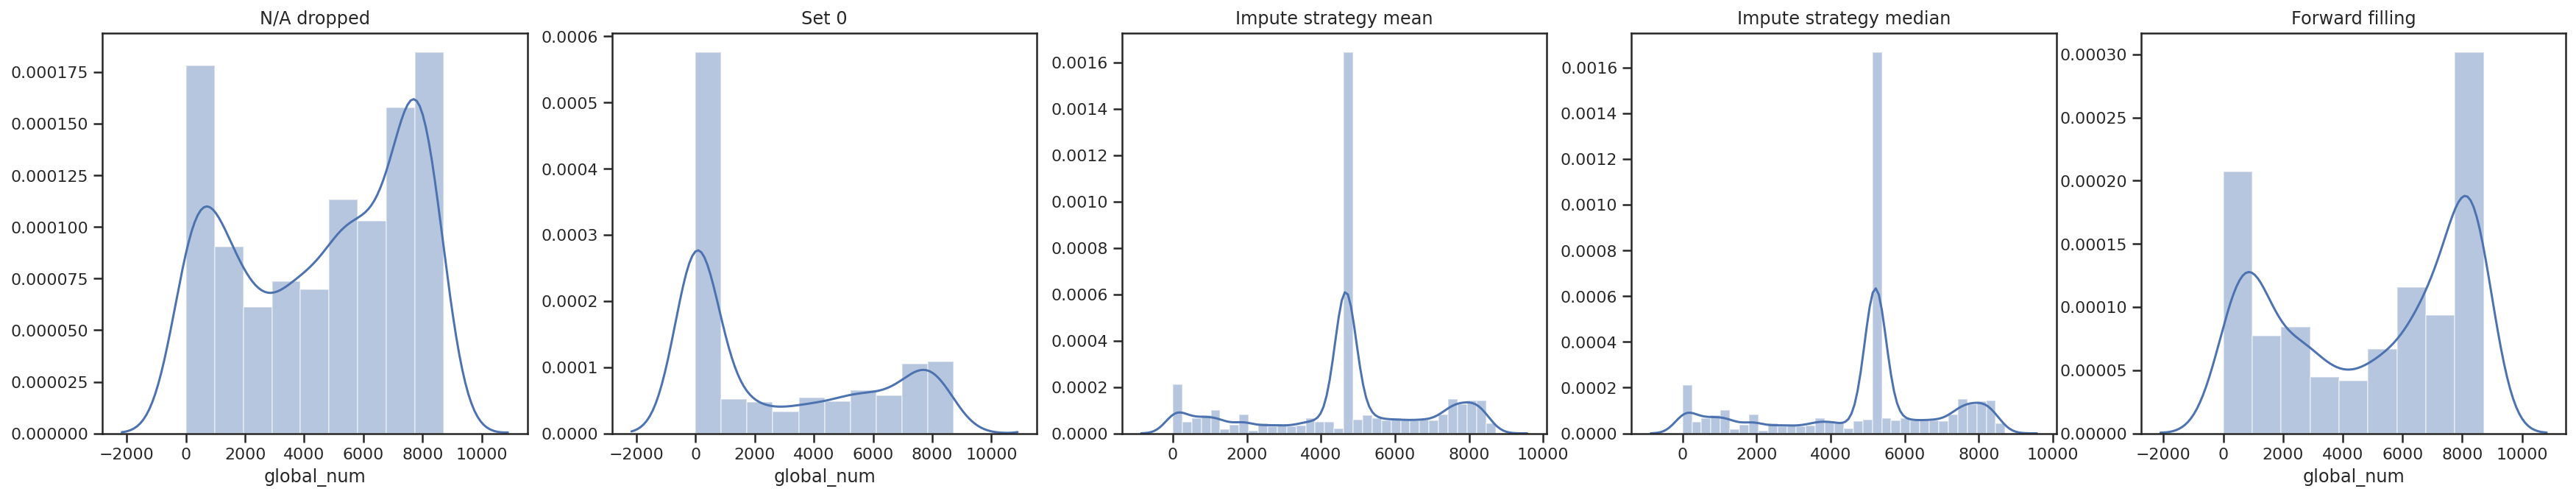

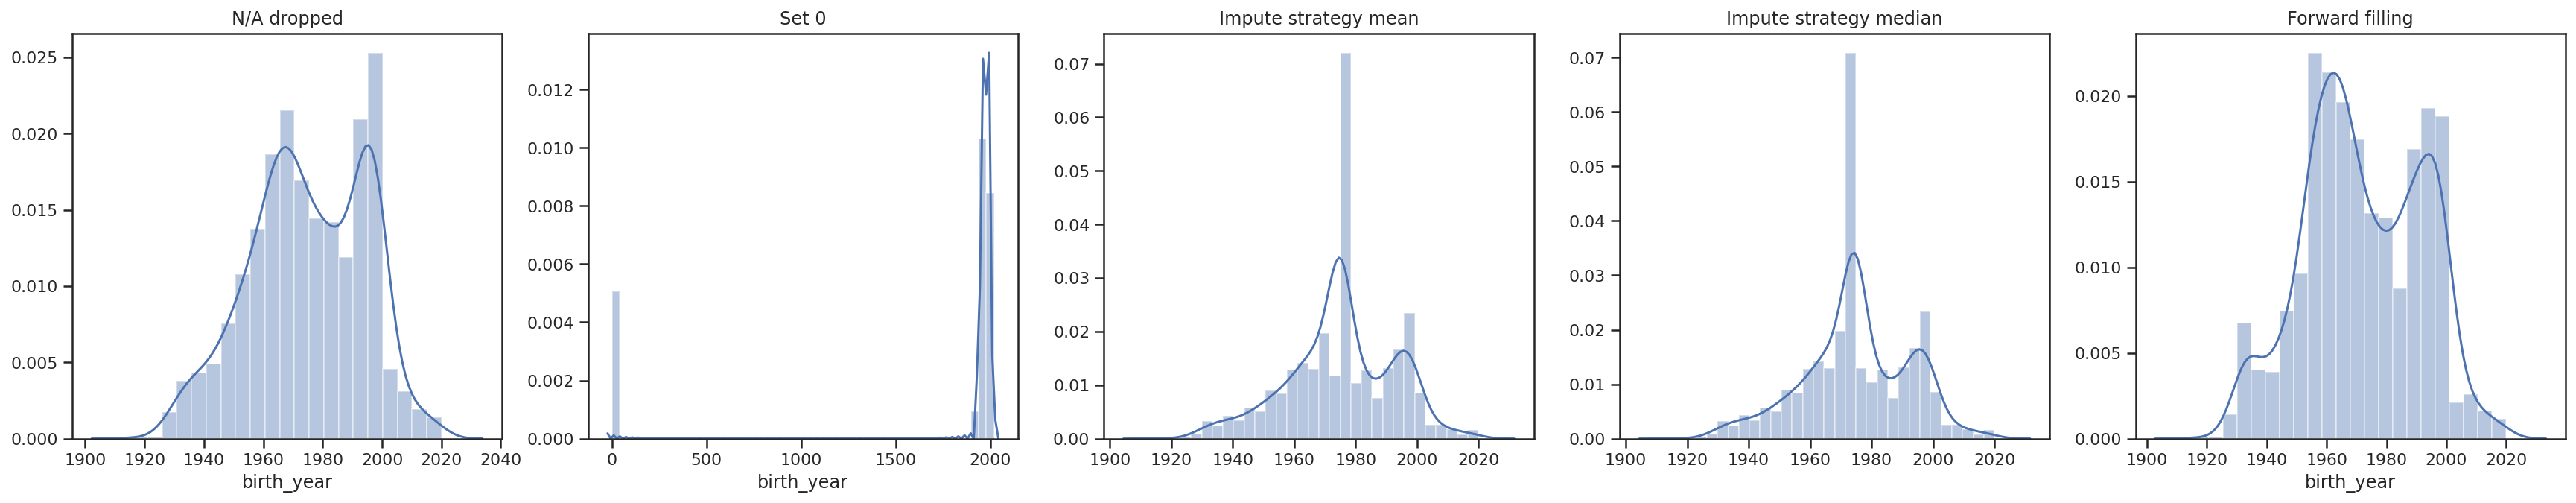

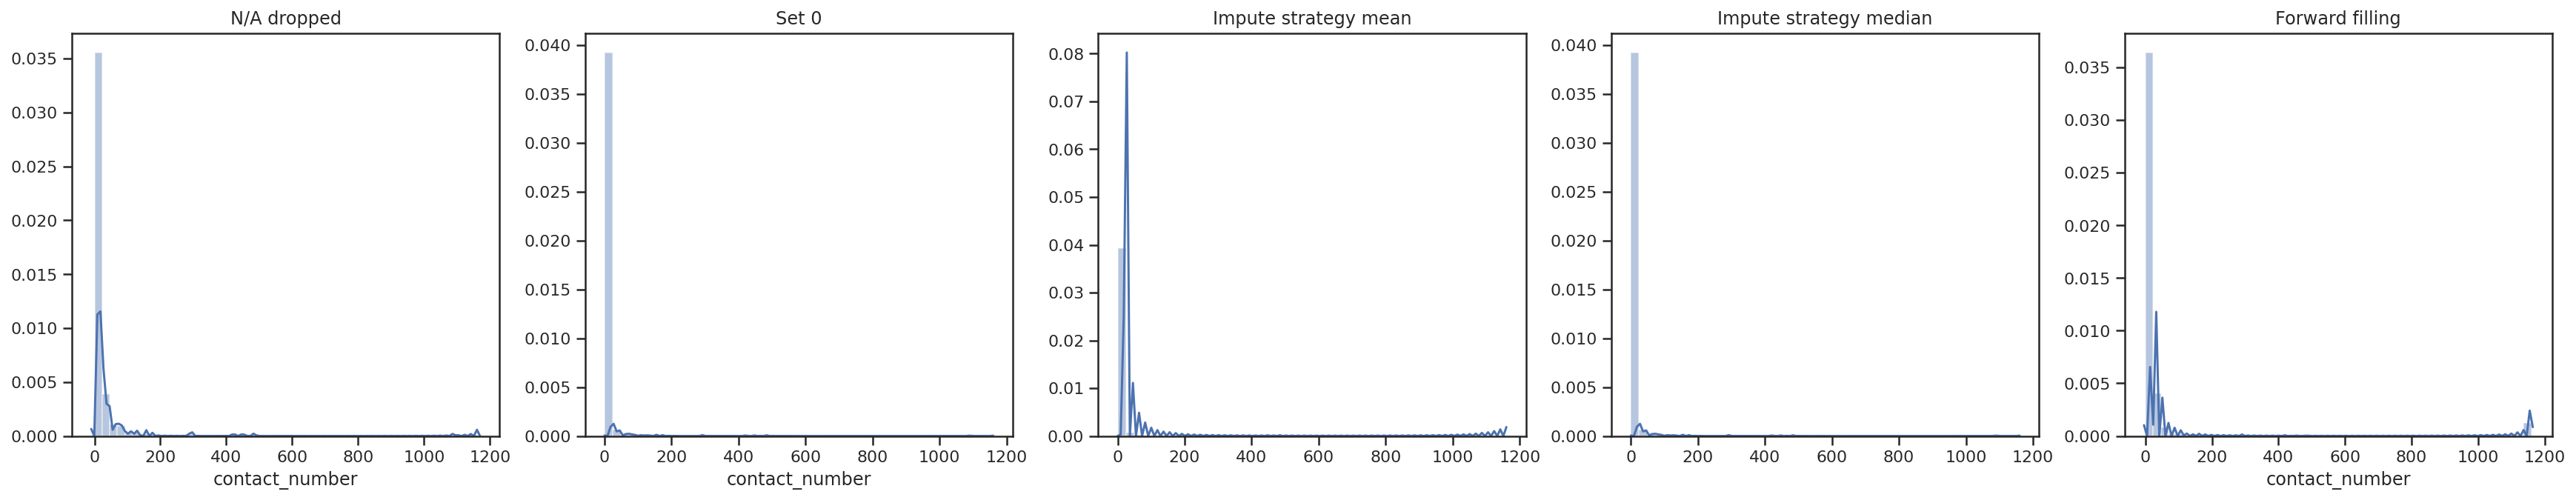

In [98]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
med_imp = sklearn.impute.SimpleImputer(strategy="median")

fig, ax =plt.subplots(1,5, figsize=(30,5))
ax[0].set_title('N/A dropped')
ax[1].set_title('Set 0')
ax[2].set_title('Impute strategy mean')
ax[3].set_title('Impute strategy median')
ax[4].set_title('Forward filling')
sns.distplot(data["global_num"].dropna(), ax=ax[0])
sns.distplot(data["global_num"].fillna(0), ax=ax[1])
sns.distplot(mean_imp.fit_transform(data[["global_num"]]), ax=ax[2])
sns.distplot(med_imp.fit_transform(data[["global_num"]]), ax=ax[3])
sns.distplot(data["global_num"].fillna(method='ffill'), ax=ax[4])
fig.show()

fig, ax =plt.subplots(1,5, figsize=(30,5))
ax[0].set_title('N/A dropped')
ax[1].set_title('Set 0')
ax[2].set_title('Impute strategy mean')
ax[3].set_title('Impute strategy median')
ax[4].set_title('Forward filling')
sns.distplot(data["birth_year"].dropna(), ax=ax[0])
sns.distplot(data["birth_year"].fillna(0), ax=ax[1])
sns.distplot(mean_imp.fit_transform(data[["birth_year"]]), ax=ax[2])
sns.distplot(med_imp.fit_transform(data[["birth_year"]]), ax=ax[3])
sns.distplot(data["birth_year"].fillna(method='ffill'), ax=ax[4])
fig.show()

fig, ax =plt.subplots(1,5, figsize=(30,5))
ax[0].set_title('N/A dropped')
ax[1].set_title('Set 0')
ax[2].set_title('Impute strategy mean')
ax[3].set_title('Impute strategy median')
ax[4].set_title('Forward filling')
sns.distplot(data["contact_number"].dropna(), ax=ax[0])
sns.distplot(data["contact_number"].fillna(0), ax=ax[1])
sns.distplot(mean_imp.fit_transform(data[["contact_number"]]), ax=ax[2])
sns.distplot(med_imp.fit_transform(data[["contact_number"]]), ax=ax[3])
sns.distplot(data["contact_number"].fillna(method='ffill'), ax=ax[4])
fig.show()

##Кодирование категориальных признаков


Кодирование категорий целочисленными значениями

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
data_age = le.fit_transform(data['age'].dropna())
data['age'].dropna().unique()

print(np.unique(data_age))
le.inverse_transform(np.unique(data_age))

[ 0  1  2  3  4  5  6  7  8  9 10]


array(['0s', '100s', '10s', '20s', '30s', '40s', '50s', '60s', '70s',
       '80s', '90s'], dtype=object)

Кодирование категорий наборами бинарных значений

In [0]:
ohe = OneHotEncoder()
data_province = ohe.fit_transform(data[['province']].dropna())
data_province.todense()[0:4]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.]])

Быстрый вариант one-hot кодирования

In [0]:
data_city = pd.get_dummies(data['city'].dropna())
data_city.head()

,Andong-si,Ansan-si,Anseong-si,Anyang-si,Asan-si,Bonghwa-gun,Bucheon-si,Buk-gu,Bupyeong-gu,Busanjin-gu,Changnyeong-gun,Changwon-si,Cheonan-si,Cheongdo-gun,Cheongju-si,Cheongsong-gun,Chilgok-gun,Chunchun-si,Chungju-si,Daedeok-gu,Dalseo-gu,Dalseong-gun,Danyang-gun,Dobong-gu,Dong-gu,Dongdaemun-gu,Dongjak-gu,Dongnae-gu,Eumseong-gun,Eunpyeong-gu,Gangbuk-gu,Gangdong-gu,Gangnam-gu,Gangneung-si,Gangseo-gu,Geochang-gun,Geoje-si,Geumcheon-gu,Geumjeong-gu,Gimcheon-si,...,Sasang-gu,Sejong,Seo-gu,Seocho-gu,Seodaemun-gu,Seongbuk-gu,Seongdong-gu,Seongju-gun,Seongnam-si,Seosan-si,Siheung-si,Sokcho-si,Songpa-gu,Suncheon-si,Suseong-gu,Suwon-si,Suyeong-gu,Taebaek-si,Uijeongbu-si,Uiseong-gun,Uiwang-si,Ulju-gun,Wonju-si,Wuhan,Yangcheon-gu,Yangsan-si,Yecheon-gun,Yeongcheon-si,Yeongdeok-gun,Yeongdeungpo-gu,Yeongju-si,Yeongyang-gun,Yeonje-gu,Yeonsu-gu,Yeosu-si,Yongin-si,Yongsan-gu,Yuseong-gu,etc,pocheon-si
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Масштабирование данных

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


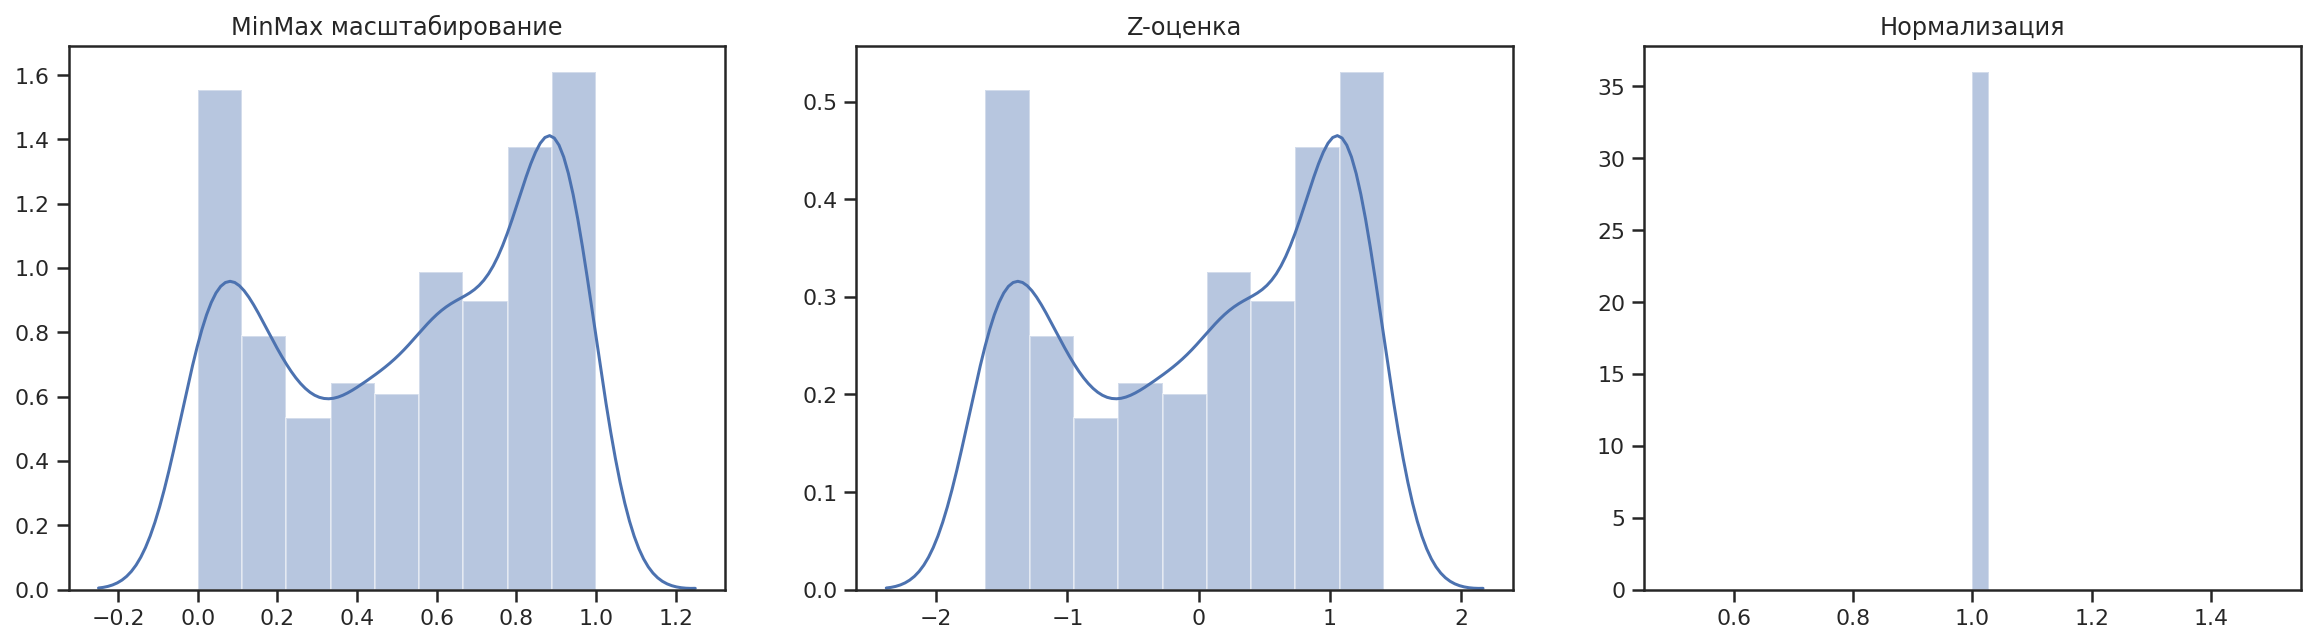

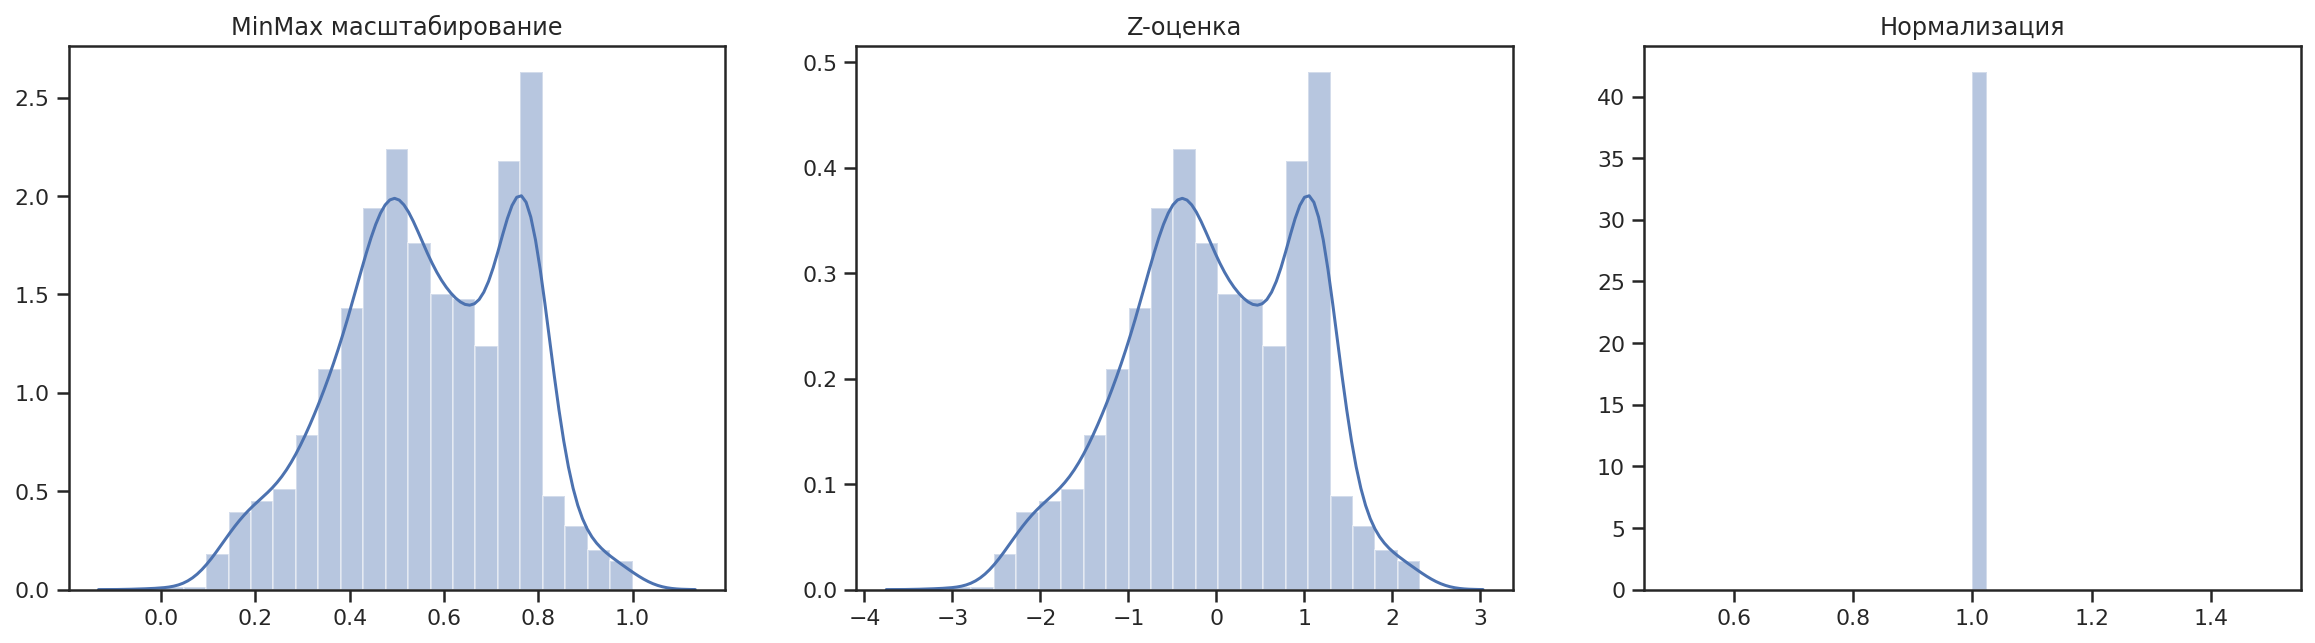

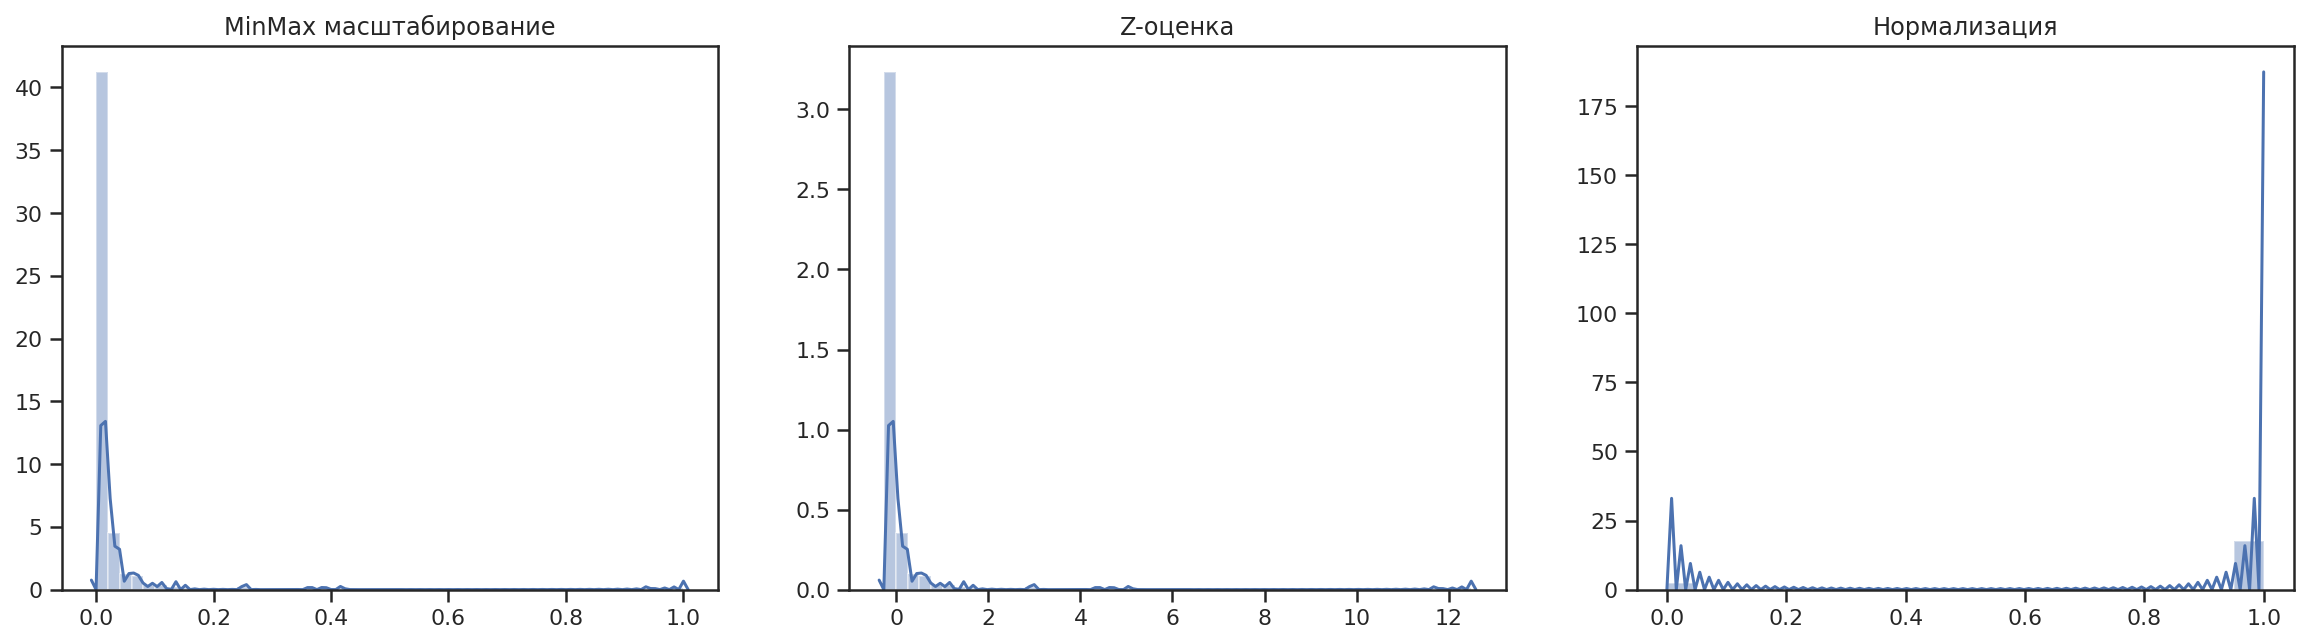

In [0]:
sc1 = sklearn.preprocessing.MinMaxScaler()
sc2 = sklearn.preprocessing.StandardScaler()
sc3 = sklearn.preprocessing.Normalizer()

fig, ax =plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('MinMax масштабирование')
ax[1].set_title('Z-оценка')
ax[2].set_title('Нормализация')
sns.distplot(sc1.fit_transform(data[["global_num"]].dropna()), ax=ax[0]);
sns.distplot(sc2.fit_transform(data[["global_num"]].dropna()), ax=ax[1]);
sns.distplot(sc3.fit_transform(data[["global_num"]].dropna()), ax=ax[2]);
fig.show()

fig, ax =plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('MinMax масштабирование')
ax[1].set_title('Z-оценка')
ax[2].set_title('Нормализация')
sns.distplot(sc1.fit_transform(data[["birth_year"]].dropna()), ax=ax[0]);
sns.distplot(sc2.fit_transform(data[["birth_year"]].dropna()), ax=ax[1]);
sns.distplot(sc3.fit_transform(data[["birth_year"]].dropna()), ax=ax[2]);
fig.show()

fig, ax =plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('MinMax масштабирование')
ax[1].set_title('Z-оценка')
ax[2].set_title('Нормализация')
sns.distplot(sc1.fit_transform(data[["contact_number"]].dropna()), ax=ax[0]);
sns.distplot(sc2.fit_transform(data[["contact_number"]].dropna()), ax=ax[1]);
sns.distplot(sc3.fit_transform(data[["contact_number"]].dropna()), ax=ax[2]);
fig.show()